In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
def autopct_format(values): #Função para converter dados em valores absolutos
    def my_format(pct): 
        total = sum(values) 
        val = int(round(pct * total / 100.0))
        return ' $ {v:d}'.format(v = val)
    return my_format

In [3]:
df_vendas = pd.read_csv('Dados/dataset.csv')

In [4]:
df_vendas.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [5]:
df_vendas_p10 = df_vendas.groupby(['Categoria', 'SubCategoria']).sum(numeric_only=True).sort_values('Valor_Venda', ascending=False).head(12)
df_vendas_p10 = df_vendas_p10[['Valor_Venda']].astype(int).sort_values(by='Categoria').reset_index()
df_vendas_p10

,Categoria,SubCategoria,Valor_Venda
0,Furniture,Chairs,317919
1,Furniture,Tables,202083
2,Furniture,Bookcases,108045
3,Furniture,Furnishings,88862
4,Office Supplies,Storage,216188
5,Office Supplies,Binders,194723
6,Office Supplies,Appliances,104061
7,Office Supplies,Paper,76312
8,Technology,Phones,325271
9,Technology,Machines,189238


In [6]:
df_vendas_p10_cat = df_vendas_p10.groupby('Categoria').sum(numeric_only=True).reset_index()
df_vendas_p10_cat

,Categoria,Valor_Venda
0,Furniture,716909
1,Office Supplies,591284
2,Technology,823548


In [7]:
cores_categorias = ['#5d00de',
                    '#0ee84f',
                    '#e80e27']
cores_subcategorias = ['#aa8cd4',
                       '#aa8cd5',
                       '#aa8cd6',
                       '#aa8cd7',
                       '#26c957',
                       '#26c958',
                       '#26c959',
                       '#26c960',
                       '#e65e65',
                       '#e65e66',
                       '#e65e67',
                       '#e65e68']

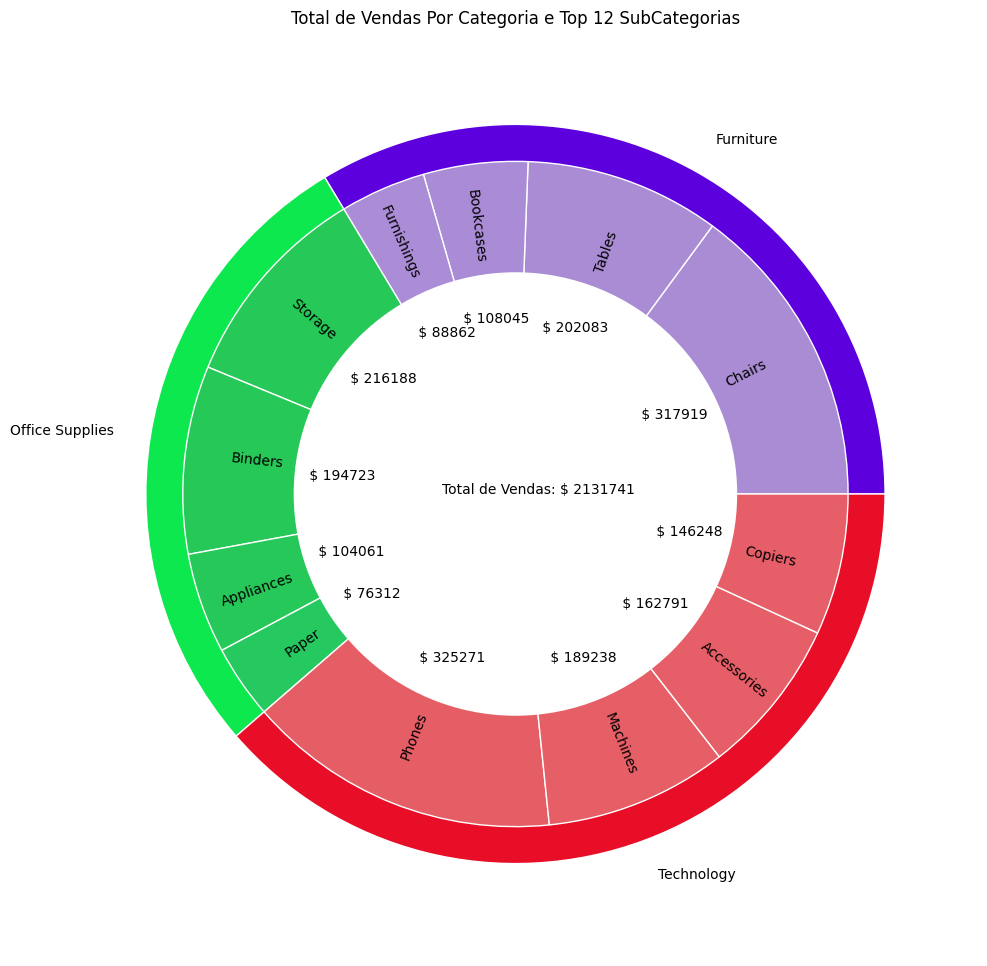

In [8]:
fig, ax = plt.subplots(figsize=(18, 12))

# Gráfico das categorias
p1 = ax.pie(df_vendas_p10_cat['Valor_Venda'], 
            radius=1,
            labels=df_vendas_p10_cat['Categoria'],
            wedgeprops=dict(edgecolor='white'),
            colors=cores_categorias)

# Gráfico das subcategorias
p2 = ax.pie(df_vendas_p10['Valor_Venda'],
            radius=0.9,
            labels=df_vendas_p10['SubCategoria'],
            autopct=autopct_format(df_vendas_p10['Valor_Venda']),
            colors=cores_subcategorias, 
            labeldistance=0.7,
            wedgeprops=dict(edgecolor='white'), 
            pctdistance=0.53,
            rotatelabels=True)

# Limpa o centro do círculo
centre_circle = plt.Circle((0, 0), 0.6, fc='white')

# Labels e anotações
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.annotate(text='Total de Vendas: ' + '$ ' + str(int(sum(df_vendas_p10['Valor_Venda']))), xy=(-0.2, 0))
plt.title('Total de Vendas Por Categoria e Top 12 SubCategorias')
plt.show()
